In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
data= pd.read_csv('/content/creditcard.csv')
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


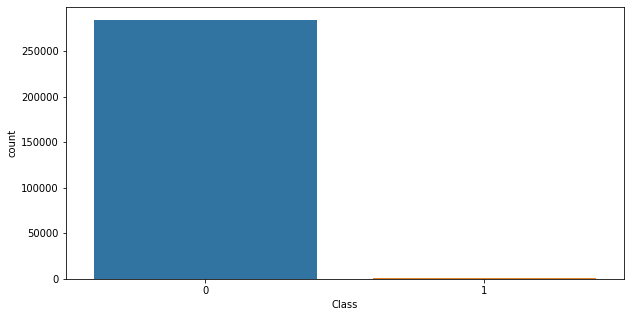

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="Class",data=data)
plt.show()

In [14]:
legit_sample = legit.sample(fraud.shape[0])
print(legit_sample.shape)

(492, 31)


In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

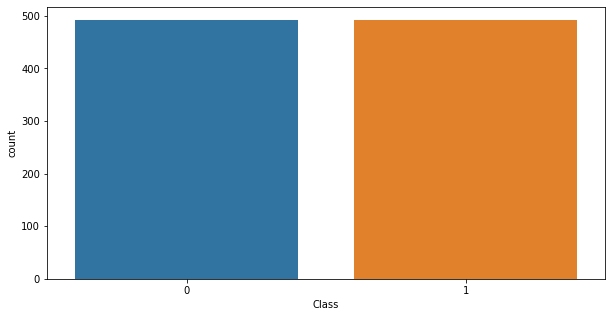

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Class",data=new_dataset)
plt.show()

In [18]:
new_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
new_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86765.215447,-2.388314,1.791378,-3.479848,2.257207,-1.614498,-0.695818,-2.755139,0.308160,-1.317093,...,0.351327,-0.013201,-0.035084,-0.069769,0.021517,0.023854,0.082633,0.025930,106.890478,0.500000
std,47666.924082,5.596775,3.786599,6.255838,3.221224,4.219959,1.726202,5.880662,4.852122,2.322943,...,2.784602,1.172241,1.305907,0.565554,0.664324,0.483283,1.032498,0.438078,244.084194,0.500254
min,406.000000,-35.905105,-31.041362,-31.103685,-3.454854,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.331255,-2.028024,-4.781606,-1.329589,-7.263482,-3.713108,0.000000,0.000000
25%,45391.000000,-2.867222,-0.213050,-5.113334,-0.087296,-1.702917,-1.530108,-3.066415,-0.182460,-2.313050,...,-0.188311,-0.583588,-0.247440,-0.409999,-0.318004,-0.294399,-0.057741,-0.055148,1.442500,0.000000
50%,78612.000000,-0.757545,0.962931,-1.204261,1.307692,-0.510631,-0.626485,-0.636404,0.144816,-0.787313,...,0.145712,-0.021530,-0.025030,-0.010642,0.056921,-0.026234,0.046272,0.033149,20.345000,0.500000
75%,134673.750000,1.081567,2.791569,0.349816,4.229802,0.418367,0.083588,0.255014,0.872208,0.105412,...,0.632794,0.564606,0.204034,0.355319,0.395141,0.320108,0.437850,0.206210,101.500000,1.000000
max,172700.000000,2.396045,22.057729,2.905010,12.114672,11.095089,10.713326,16.687265,20.007208,7.929051,...,27.202839,8.361985,5.466230,1.125783,2.208209,2.745261,6.228140,1.779364,3552.960000,1.000000


In [40]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [41]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
183858  125982.0 -1.016506  0.474832  1.677247  0.213171  0.337377 -0.088364   
64576    51209.0 -1.038832 -0.447452  2.126990  0.290475 -0.189608  2.419004   
264064  161250.0  2.326307 -1.569953 -1.156700 -1.914834 -0.874438  0.462898   
153441   99074.0  2.041392  0.099627 -0.912517  0.609525  0.043027 -1.055371   
271247  164485.0  0.075938  1.029008 -0.205773 -0.436418  0.802001 -1.027624   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [42]:
print(y)

183858    0
64576     0
264064    0
153441    0
271247    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [44]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

***Applying logistic Regression***

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg=LogisticRegression()

In [47]:
reg.fit(X_train,Y_train)

LogisticRegression()

In [52]:
y_train_pred=reg.predict(X_train)

In [48]:
y_test_pred=reg.predict(X_test)

In [53]:
print("The training accuracy is",accuracy_score(Y_train, y_train_pred))

The training accuracy is 0.9275730622617535


In [54]:
print("The test accuracy is",accuracy_score(Y_test, y_test_pred))

The test accuracy is 0.9035532994923858


In [55]:
reg_test_acc=accuracy_score(Y_test, y_test_pred)
reg_train_acc=accuracy_score(Y_train, y_train_pred)

In [ ]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 62,   3],
       [  1, 145]])

In [56]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.903553
Precision: 0.906909
Recall: 0.903553


***Applying SVM***

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train,Y_train)

SVC()

In [58]:
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)

In [59]:
print("The training accuracy is",accuracy_score(Y_train, y_train_pred))
print("The test accuracy is",accuracy_score(Y_test, y_test_pred))

The training accuracy is 0.542566709021601
The test accuracy is 0.5532994923857868


In [60]:
y_pred=svm.predict(x)
print("The accuracy is",accuracy_score(y, y_pred))

The accuracy is 0.5447154471544715


In [61]:
svm_test_acc=accuracy_score(Y_test, y_test_pred)
svm_train_acc=accuracy_score(Y_train, y_train_pred)

In [62]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[65, 34],
       [54, 44]])

In [63]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.553299
Precision: 0.555115
Recall: 0.553299


***Applying Random Forest***

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10) 
rf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10)

In [65]:
# performing predictions on the test dataset
y_test_pred = rf.predict(X_test)
# performing predictions on the train dataset
y_train_pred = rf.predict(X_train)


In [ ]:
y_pred=rf.predict(x)

In [66]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(Y_test, y_test_pred))


ACCURACY OF THE TEST MODEL:  0.9238578680203046


In [67]:
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(Y_train, y_train_pred))

ACCURACY OF THE TRAIN MODEL:  0.9923761118170267


In [68]:
rf_test_acc=accuracy_score(Y_test, y_test_pred)
rf_train_acc=accuracy_score(Y_train, y_train_pred)

In [69]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ",accuracy_score(y, y_pred))

ACCURACY OF THE MODEL:  0.5447154471544715


In [70]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[97,  2],
       [13, 85]])

In [71]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.923858
Precision: 0.929173
Recall: 0.923858


***Applying NN***

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [73]:
nn = MLPClassifier(random_state=2, max_iter=100).fit(X_train, Y_train)

In [74]:
# performing predictions on the test dataset
y_test_pred = nn.predict(X_test)
# performing predictions on the train dataset
y_train_pred = nn.predict(X_train)

In [75]:
y_pred=nn.predict(x)

In [76]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE TRAIN MODEL: ", accuracy_score(Y_test, y_test_pred))

ACCURACY OF THE TRAIN MODEL:  0.49746192893401014


In [77]:
print("ACCURACY OF THE TEST MODEL: ", accuracy_score(Y_train, y_train_pred))

ACCURACY OF THE TEST MODEL:  0.5019059720457433


In [78]:
nn_test_acc=accuracy_score(Y_test, y_test_pred)
nn_train_acc=accuracy_score(Y_train, y_train_pred)

In [79]:
confusion_matrix(Y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

array([[ 0, 99],
       [ 0, 98]])

In [80]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_test_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_test_pred,average='weighted')
print('Recall: %f' % recall)

Accuracy: 0.497462
Precision: 0.247468
Recall: 0.497462


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


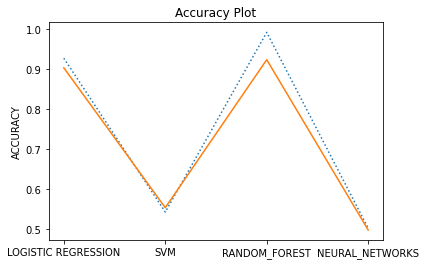

In [82]:
trainpoints =  np.array([reg_train_acc,svm_train_acc,rf_train_acc,nn_train_acc])
testpoints = np.array([reg_test_acc,svm_test_acc,rf_test_acc,nn_test_acc])
labels=np.array(["LOGISTIC REGRESSION","SVM","RANDOM_FOREST","NEURAL_NETWORKS"])
plt.plot(labels,trainpoints, linestyle = 'dotted')

plt.plot(labels,testpoints, linestyle = 'solid',label=labels)
plt.title("Accuracy Plot")
# plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")
plt.show()